In [1]:
# https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html
# https://jaketae.github.io/study/pytorch-rnn/

In [2]:
import os
import random
from string import ascii_letters

import torch
from torch import nn
import torch.nn.functional as F
from unidecode import unidecode
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
%matplotlib inline

from dataset import get_tensor, get_train_test_data
from model import GRUModel
from train import train, evaluate, train_rnn, evaluate_rnn
from config import *

_ = torch.manual_seed(42)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(device)

cpu


In [3]:
data_dir = "../data/names"
tensor_names, target_langs, num_langs, num_letters = get_tensor(data_dir)
train_dataset, test_dataset = get_train_test_data(tensor_names, target_langs)

num_lang, 18 num_letters 59
Train: 18063
Test: 2007


In [4]:
names, labels = next(iter(train_dataset))
print(names.shape)

torch.Size([10, 1, 59])


In [5]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.in2hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.in2output = nn.Linear(input_size + hidden_size, output_size)
    
    def forward(self, x, hidden_state):
        combined = torch.cat((x, hidden_state), 1)
        hidden = torch.sigmoid(self.in2hidden(combined))
        output = self.in2output(combined)
        return output, hidden
    
    def init_hidden(self):
        # return nn.init.kaiming_uniform_(torch.empty(1, self.hidden_size))
        return torch.zeros(1, self.hidden_size)

In [6]:
model = RNN(num_letters, hidden_size, num_langs).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss().to(device)

In [7]:
acc_list = train_rnn(model, device, train_dataset, test_dataset, optimizer, criterion)

Epoch [1/4], Step [3000/18063], Loss: 1.8427
Accuracy: 52.6158%
Epoch [1/4], Step [6000/18063], Loss: 1.4596
Accuracy: 59.2925%
Epoch [1/4], Step [9000/18063], Loss: 1.2435
Accuracy: 61.4350%
Epoch [1/4], Step [12000/18063], Loss: 1.2317
Accuracy: 65.2217%
Epoch [1/4], Step [15000/18063], Loss: 1.1663
Accuracy: 66.0189%
Epoch [1/4], Step [18000/18063], Loss: 1.1744
Accuracy: 68.0618%
Epoch [2/4], Step [3000/18063], Loss: 1.1080
Accuracy: 68.6099%
Epoch [2/4], Step [6000/18063], Loss: 1.0622
Accuracy: 68.5102%
Epoch [2/4], Step [9000/18063], Loss: 1.0662
Accuracy: 69.1081%
Epoch [2/4], Step [12000/18063], Loss: 1.0277
Accuracy: 70.8520%
Epoch [2/4], Step [15000/18063], Loss: 1.0708
Accuracy: 68.9586%
Epoch [2/4], Step [18000/18063], Loss: 1.0019
Accuracy: 70.6029%
Epoch [3/4], Step [3000/18063], Loss: 0.9552
Accuracy: 70.3039%
Epoch [3/4], Step [6000/18063], Loss: 1.0059
Accuracy: 71.9482%
Epoch [3/4], Step [9000/18063], Loss: 0.9411
Accuracy: 73.0942%
Epoch [3/4], Step [12000/18063], L

In [8]:
evaluate_rnn(model, device, test_dataset)

Accuracy: 72.5959%


72.59591429995017

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


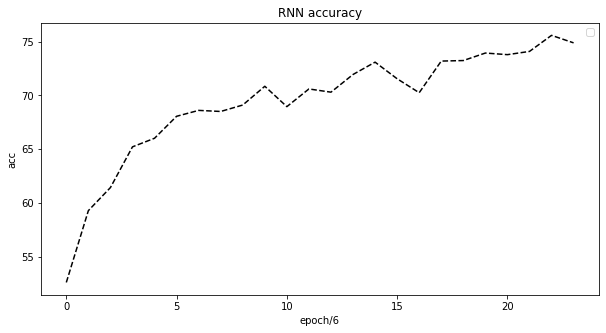

In [9]:
plt.figure(figsize=(10, 5))
plt.title('RNN accuracy')
plt.xlabel('epoch/6')
plt.ylabel('acc')
plt.legend(loc='best')
plt.plot(acc_list, 'k--')